
# Co2 Emissions and Effect on Human Health:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this project**, we are trying to Analyze CO2 emisions over years in about 200 countries and trying to find relationships between this emisions and human health (represented in lung cancer new cases). Also, We are trying to find any relationships between oil consumptions for countries and the CO2 emisions.
>
>The study of this relationships provides a proven evidences if we can reduce CO2 emisions by reducing our dependence on oil to produce energy and Turning to new clean sources. And if we can reduce lung cancer cases if we succeed in reducing co2 emisions.
>
> **Dataset** used in this analysis is downloaded from ["GapMinder"](https://www.gapminder.org/data/). Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators.
>
> Our Dataset consists of three files, Each file for one indicator as follows:
>> * Data on CO2 emisions over years per person for about 200 country. (Tonnes/person)
>> * Data on Lung cancer new cases over years per 100K men for about 200 country. (lung cancer case/100K men)
>> * Data on Oil consumption over years per person. (Tonnes/person)

> In this project, We will make full use of gathered data to answer 2 specific questions:
> * **Does increase in Co2 emisions affect number of lung cancer new cases or not?**
> * **Is there any relationship between oil consumption and CO2 emisions?**

In [1]:
#Importing useful libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Enabling inline plots
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, We are trying to get our data in a perfect form for our analysis. as we mentioned, our data is divided into 3 files. It would be nice if we combine them in one dataframe in order to make our analysis easier.

### General Properties

Loading data into pandas dataframe:

In [2]:
#Loading data
#Co2 Emission per person (in tonnes):
co2_per_person = pd.read_csv('co2_per_person.csv')
#Lung cancer new cases per 100,000 men:
lung_cancer_cases = pd.read_csv('lung_cancer_new_cases.csv')
#Oil consumption per person:
oil_consum = pd.read_csv('oil_consumption_per_person.csv')

In [3]:
#Dispaly all columns without truncations:
pd.set_option('display.max_columns', None)
#Dispaly all rows without truncations:
pd.set_option('display.max_rows', None)

**CO2 Emisions per person:**

In [4]:
co2_per_person.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00192,0.0109,0.0117,0.0115,0.0132,0.0131,0.0186,0.0218,0.0344,0.038,0.0436,0.046,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,0.0865,0.150,0.165,0.130,0.135,0.154,0.168,0.153,0.181,0.162,0.167,0.132,0.15,0.163,0.201,0.231,0.294,0.267,0.269,0.246,0.233,0.21,0.183,0.0954,0.0844,0.0752,0.068,0.0619,0.0561,0.0522,0.0402,0.037,0.0376,0.0471,0.0509,0.0368,0.0515,0.0622,0.0838,0.152,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00711,0.00703,0.0174,0.12100,0.27600,0.32100,0.3940,0.6240,0.5580,0.6550,0.4020,0.1320,0.103,0.4060,0.769,0.5770,0.81900,0.2350,0.3130,0.2840,0.3070,0.3630,0.4670,0.5760,1.0000,0.779,0.9100,1.240,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,1.5500,1.740,1.980,2.500,2.290,1.840,1.910,2.010,2.270,2.520,2.890,1.930,2.68,2.620,2.680,2.690,2.650,2.650,2.380,2.290,2.760,1.68,1.310,0.7750,0.7310,0.6120,0.670,0.6510,0.4980,0.5630,0.9560,0.966,1.0300,1.2000,1.3800,1.3400,1.3800,1.2700,1.2900,1.460,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00065,0.0013,0.00323,0.00321,0.00383,0.00443,0.00438,0.00248,0.0049,0.00545,0.00659,0.00948,0.0117,0.0127,0.0131,0.0152,0.0171,0.01790,0.02030,0.0189,0.00722,0.00963,0.00448,0.0215,0.0313,0.0403,0.0635,0.0589,0.0616,0.075,0.0915,0.088,0.0935,0.10400,0.4270,0.45

In [5]:
print("number of rows: " + str(co2_per_person.shape[0]))
print("number of columns: " + str(co2_per_person.shape[1]))

number of rows: 192
number of columns: 220


**Lung Cancer cases per 100K men**

In [6]:
lung_cancer_cases.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,25.2,25.3,25.4,25.5,25.6,25.6,25.6,25.6,25.5,25.5,25.6,25.6,25.6,25.7,25.7,25.7,25.6,25.5,25.4,25.3,25.2,25.2,25.2,25.3,25.3,25.4
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.4,45.2,44.7,44.6,44.8,45.6,46.3,47.4,48.2,48.6,49.2,48.8,48.6,48.1,47.4,46.6,46.2,45.6,45.5,45.2,44.3,43.9,43.6,43.6,43.7,43.8,43.9
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.4,21.4,20.3,19.5,18.9,18.5,16.8,15.3,14.1,13.2,12.5,11.6,11.5,11.4,11.4,11.7,11.2,10.9,10.6,10.3,10.1,10.1,10.1,10.0,10.0,10.0,10.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,50.9,50.5,49.2,48.0,47.1,46.3,45.8,45.3,45.2,45.0,44.8,44.6,45.0,45.5,45.7,45.3,44.9,44.5,44.2,44.0,44.4,44.8,45.1,45.5,46.0,46.5
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,14.7,14.4,14.2,14.0,13.8,13.6,13.2,12.9,12.7,12.4,12.2,11.9,11.7,11.5,11.3,11.3,11.2,11.3,11.3,11.3,11.4,11.5,11.6,11.7,11.8,11.9


In [7]:
print("number of rows: " + str(lung_cancer_cases.shape[0]))
print("number of columns: " + str(lung_cancer_cases.shape[1]))

number of rows: 187
number of columns: 65


**Oil Consumption per person**

In [8]:
oil_consum.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Algeria,0.103,0.131,0.119,0.123,0.126,0.140,0.154,0.164,0.174,0.188,0.203,0.227,0.25,0.250,0.291,0.285,0.297,0.305,0.332,0.357,0.355,0.350,0.343,0.334,0.341,0.355,0.344,0.337,0.329,0.307,0.293,0.275,0.269,0.272,0.265,0.273,0.279,0.306,0.314,0.324,0.333,0.342,0.378,0.404,0.421,0.412,0.432,0.450,0.461,0.470,0.490,0.466,0.448,0.449,0.467
1,Argentina,0.995,1.010,1.020,1.030,1.050,0.926,0.973,0.959,0.945,0.937,0.867,0.888,0.92,0.906,0.945,0.870,0.791,0.747,0.751,0.696,0.620,0.702,0.738,0.727,0.649,0.604,0.611,0.636,0.622,0.591,0.583,0.599,0.592,0.599,0.551,0.551,0.524,0.479,0.488,0.507,0.534,0.554,0.609,0.621,0.601,0.672,0.664,0.684,0.727,0.706,0.718,0.694,0.670,0.632,0.616
2,Australia,1.340,1.550,1.660,1.760,1.760,1.910,1.970,1.970,2.070,2.170,2.120,2.140,2.21,2.190,2.200,2.090,1.990,1.970,1.910,1.970,1.850,1.860,1.870,1.920,1.960,1.960,1.880,1.860,1.940,1.990,2.030,2.030,2.050,2.020,2.070,2.030,2.020,1.990,1.970,2.000,1.950,2.080,2.010,1.980,1.930,1.880,1.970,2.010,2.020,2.010,1.910,1.890,1.960,1.990,1.950
3,Austria,0.761,0.832,0.880,1.010,1.110,1.210,1.350,1.450,1.560,1.390,1.400,1.520,1.46,1.570,1.640,1.600,1.450,1.380,1.330,1.290,1.290,1.360,1.400,1.380,1.350,1.400,1.500,1.450,1.450,1.420,1.420,1.460,1.480,1.540,1.510,1.470,1.590,1.620,1.740,1.680,1.670,1.660,1.560,1.540,1.450,1.510,1.400,1.390,1.430,1.360,1.340,1.380,1.390,1.400,1.420
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.280,1.180,1.190,1.140,1.180,1.120,1.070,1.060,0.950,0.846,0.756,0.712,0.744,0.711,0.779,0.488,0.443,0.511,0.545,0.630,0.557,0.519,0.407,0.371,0.361,0.436,0.450,0.484,0.468,0.471,0.465,0.463,0.481,0.490


In [9]:
print("number of rows: " + str(oil_consum.shape[0]))
print("number of columns: " + str(oil_consum.shape[1]))

number of rows: 77
number of columns: 56


> Capturing some issues:
>> * We can notice many missing values in old years. but data is almost present since 1995.
>> * oil consumption data is provided for only 77 country. but other 2 indicators, Data is provided for about 200 country.
>> * lung cancer cases data is provided until 2016. but for other 2 indicator, Data is provided until 2018 and 2019.

### Data Cleaning (Fixing issues and combining data)

**issue 1**: Many missing values in old years. But data is almost present since 1995.
>
> **Solution**: Drop all columns(years) before 1995


In [10]:
#Drop data before 1995:
co2_per_person = co2_per_person.set_index('country')
co2_per_person = co2_per_person.loc[ : , '1995' : ]

lung_cancer_cases = lung_cancer_cases.set_index('country')
lung_cancer_cases = lung_cancer_cases.loc[ : , '1995' : ]

oil_consum = oil_consum.set_index('country')
oil_consum = oil_consum.loc[ : , '1995' : ]

* Checking dataset:

In [11]:
co2_per_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1995    191 non-null    float64
 1   1996    191 non-null    float64
 2   1997    191 non-null    float64
 3   1998    191 non-null    float64
 4   1999    191 non-null    float64
 5   2000    191 non-null    float64
 6   2001    191 non-null    float64
 7   2002    192 non-null    float64
 8   2003    192 non-null    float64
 9   2004    192 non-null    float64
 10  2005    192 non-null    float64
 11  2006    192 non-null    float64
 12  2007    192 non-null    float64
 13  2008    192 non-null    float64
 14  2009    192 non-null    float64
 15  2010    192 non-null    float64
 16  2011    192 non-null    float64
 17  2012    192 non-null    float64
 18  2013    192 non-null    float64
 19  2014    192 non-null    float64
 20  2015    192 non-null    float64
 21  2016    192 non-null    float

* one Missing value in first 7 columns:

In [12]:
#Finding the rows with missing value:
co2_per_person[co2_per_person['1995'].isnull()]

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,,,,
Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175,0.17,0.181,0.177,0.177,0.177,0.191,0.212,0.215,0.221,0.259,0.385,0.437,0.42,0.406,0.409,0.412


In [13]:
#Filling missing values with the mean of emision of the next years:
#Calculating the mean:
mean_Timorleste_emision = co2_per_person.loc['Timor-Leste',:].mean()
#filling missing data with the mean:
co2_per_person = co2_per_person.fillna(mean_Timorleste_emision)
#Check:
co2_per_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1995    192 non-null    float64
 1   1996    192 non-null    float64
 2   1997    192 non-null    float64
 3   1998    192 non-null    float64
 4   1999    192 non-null    float64
 5   2000    192 non-null    float64
 6   2001    192 non-null    float64
 7   2002    192 non-null    float64
 8   2003    192 non-null    float64
 9   2004    192 non-null    float64
 10  2005    192 non-null    float64
 11  2006    192 non-null    float64
 12  2007    192 non-null    float64
 13  2008    192 non-null    float64
 14  2009    192 non-null    float64
 15  2010    192 non-null    float64
 16  2011    192 non-null    float64
 17  2012    192 non-null    float64
 18  2013    192 non-null    float64
 19  2014    192 non-null    float64
 20  2015    192 non-null    float64
 21  2016    192 non-null    float

In [14]:
lung_cancer_cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1995    187 non-null    float64
 1   1996    187 non-null    float64
 2   1997    187 non-null    float64
 3   1998    187 non-null    float64
 4   1999    187 non-null    float64
 5   2000    187 non-null    float64
 6   2001    187 non-null    float64
 7   2002    187 non-null    float64
 8   2003    187 non-null    float64
 9   2004    187 non-null    float64
 10  2005    187 non-null    float64
 11  2006    187 non-null    float64
 12  2007    187 non-null    float64
 13  2008    187 non-null    float64
 14  2009    187 non-null    float64
 15  2010    187 non-null    float64
 16  2011    187 non-null    float64
 17  2012    187 non-null    float64
 18  2013    187 non-null    float64
 19  2014    187 non-null    float64
 20  2015    187 non-null    float64
 21  2016    187 non-null    float

In [15]:
oil_consum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, Algeria to Vietnam
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1995    77 non-null     float64
 1   1996    77 non-null     float64
 2   1997    77 non-null     float64
 3   1998    77 non-null     float64
 4   1999    77 non-null     float64
 5   2000    77 non-null     float64
 6   2001    77 non-null     float64
 7   2002    77 non-null     float64
 8   2003    77 non-null     float64
 9   2004    77 non-null     float64
 10  2005    77 non-null     float64
 11  2006    77 non-null     float64
 12  2007    77 non-null     float64
 13  2008    77 non-null     float64
 14  2009    77 non-null     float64
 15  2010    77 non-null     float64
 16  2011    77 non-null     float64
 17  2012    77 non-null     float64
 18  2013    77 non-null     float64
 19  2014    77 non-null     float64
 20  2015    77 non-null     float64
 21  2016    77 non-null     float64
 22


> **Issue 2:** oil consumption data is provided for only 77 country. but other 2 indicators, Data is provided for about 200 country.
>
> **Issue 3:** lung cancer cases data is provided until 2016. but for other 2 indicator, Data is provided until 2018 and 2019.  

> **Solution**: We need to combine data into one dataframe to answer the two mentioned questions. but the above 2 issues would make it better to create 2 dataframes. Each dataframe will answer one question such that we combine data to get:
>> * Dataframe contains combined data from co2 emision data and lung cancer cases data to answer first question. This produced data will contain information since 1995 until 2016 (due to issue 3) for 187 country.
>> * Dataframe contains combined data from co2 emision data and oil consumption data to answer second question. This produced data will contain information since 1995 until 2018 for 77 country (due to issue 2).

**Combining DataFrames:**

First, we need to reshape dataframes into a better form using <DataFrame.melt()> method

In [16]:
co2_per_person['country'] = co2_per_person.index
#using melt() to reshape dataframe, sort results then reset the index:
co2_per_person = co2_per_person.melt(id_vars=['country'], var_name = 'year', value_name = 'CO2_Emision_per_person').sort_values(by=['country','year']).reset_index(drop=True)
co2_per_person.head()

,country,year,CO2_Emision_per_person
0,Afghanistan,1995,0.0680
1,Afghanistan,1996,0.0619
2,Afghanistan,1997,0.0561
3,Afghanistan,1998,0.0522
4,Afghanistan,1999,0.0402


In [17]:
lung_cancer_cases['country'] = lung_cancer_cases.index
#using melt() to reshape dataframe, sort results then reset the index:
lung_cancer_cases = lung_cancer_cases.melt(id_vars=['country'], var_name='year', value_name='Lung_cancer_cases_per_100K_men').sort_values(by=['country','year']).reset_index(drop=True)
lung_cancer_cases.head()

,country,year,Lung_cancer_cases_per_100K_men
0,Afghanistan,1995,25.6
1,Afghanistan,1996,25.6
2,Afghanistan,1997,25.6
3,Afghanistan,1998,25.6
4,Afghanistan,1999,25.5


In [18]:
oil_consum['country'] = oil_consum.index
#using melt() to reshape dataframe, sort results then reset the index:
oil_consum = oil_consum.melt(id_vars=['country'], var_name='year', value_name='Oil_Consumption_per_person').sort_values(by=['country','year']).reset_index(drop=True)
oil_consum.head()

,country,year,Oil_Consumption_per_person
0,Algeria,1995,0.293
1,Algeria,1996,0.275
2,Algeria,1997,0.269
3,Algeria,1998,0.272
4,Algeria,1999,0.265


Merging datasets:
>
> Co2_Emision + Oil_consumption --> Oil_co2_df
>
> Co2_Emision + lung_cancer_cases --> co2_lung_df

In [19]:
#Co2_Emision + Oil_consumption :
Oil_co2_df = pd.merge(oil_consum, co2_per_person, left_on=['country','year'], right_on=['country','year'], how='inner')
Oil_co2_df.head()

,country,year,Oil_Consumption_per_person,CO2_Emision_per_person
0,Algeria,1995,0.293,3.31
1,Algeria,1996,0.275,3.31
2,Algeria,1997,0.269,2.93
3,Algeria,1998,0.272,3.53
4,Algeria,1999,0.265,3.00


In [20]:
#Co2_Emision + lung_cancer_cases
co2_lung_df = pd.merge(co2_per_person, lung_cancer_cases, left_on=['country','year'], right_on=['country','year'], how='inner')
co2_lung_df.head()

,country,year,CO2_Emision_per_person,Lung_cancer_cases_per_100K_men
0,Afghanistan,1995,0.0680,25.6
1,Afghanistan,1996,0.0619,25.6
2,Afghanistan,1997,0.0561,25.6
3,Afghanistan,1998,0.0522,25.6
4,Afghanistan,1999,0.0402,25.5


**Making Some Modifications for easier analysis:**

We can make our datasets more compact by Calculating the mean for each country:

In [21]:
co2_lung_df = co2_lung_df.groupby('country').mean()
co2_lung_df.head()

,CO2_Emision_per_person,Lung_cancer_cases_per_100K_men
country,,
Afghanistan,0.143468,25.486364
Albania,1.269273,46.095455
Algeria,3.199091,11.881818
Andorra,6.794545,45.250000
Angola,0.966818,11.977273


In [22]:
Oil_co2_df = Oil_co2_df.groupby('country').mean()
Oil_co2_df.head()

,Oil_Consumption_per_person,CO2_Emision_per_person
country,,
Algeria,0.367750,3.234583
Argentina,0.606625,4.200000
Australia,1.991667,18.041667
Austria,1.499583,8.436250
Azerbaijan,0.545750,3.788333


<a id='eda'></a>
## Exploratory Data Analysis

**Exploring Merged DataSets**

In [23]:
#Exploring oil_co2 dataset:
Oil_co2_df.describe()

,Oil_Consumption_per_person,CO2_Emision_per_person
count,77.000000,77.000000
mean,1.462668,8.432720
std,1.611052,7.655449
min,0.032204,0.317375
25%,0.516083,4.086667
50%,1.000500,6.802917
75%,1.781667,10.331667
max,10.521667,51.204167


From the results above:
> For Oil consumption per person dataset:
>>* based on std deviation value, the spread of oil consumption per person over countries is low. 
>>* inter-quartile range = 1.2 tonnes/person.

In [24]:
#Exploring co2_lung_cases dataset:
co2_lung_df.describe()

,CO2_Emision_per_person,Lung_cancer_cases_per_100K_men
count,187.000000,187.000000
mean,4.569895,32.200002
std,6.421382,23.535591
min,0.032855,4.900455
25%,0.511659,11.561364
50%,2.148182,24.840909
75%,6.408182,49.513636
max,52.322727,96.281818


From results above:
> For Co2 Emision per person data:
>> * based on std deviation, spread of emisions over countries is relatively high.
>> * inter-quartile range is about 6 tonnes per person

> For lung cancer data per 100k men:
>> * based on std deviation, spread of cases over countries is High.
>> * inter-quartile range is about 38 men per 100K men.

**Visualizing Data of each Variable:**(Univariate)

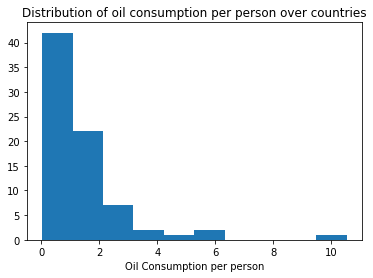

In [25]:
# Histogram of oil consumption:
plt.title("Distribution of oil consumption per person over countries")
plt.xlabel("Oil Consumption per person")
plt.hist(Oil_co2_df['Oil_Consumption_per_person'], bins = 10);

From the Histogram of Oil consumption data:
> * The distribution of data is right skewed. 
> * Outlier existence.

In [26]:
# Finding the country causing outlier in oil consumption:
Oil_co2_df[Oil_co2_df['Oil_Consumption_per_person'] > 8]

,Oil_Consumption_per_person,CO2_Emision_per_person
country,,
Singapore,10.521667,9.835


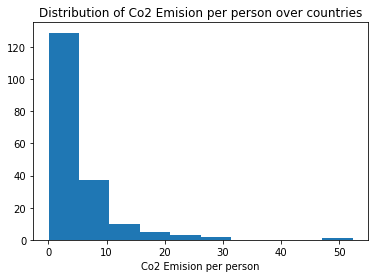

In [27]:
# Histogram of Co2 emision:
plt.title("Distribution of Co2 Emision per person over countries")
plt.xlabel("Co2 Emision per person")
plt.hist(co2_lung_df['CO2_Emision_per_person'], bins = 10);

From the Histogram of Co2 Emision data:
> * The distribution of data is right skewed. 
> * Outlier existence.

In [28]:
# Finding the country causing outlier in co2 emision:
co2_lung_df[co2_lung_df['CO2_Emision_per_person'] > 40]

,CO2_Emision_per_person,Lung_cancer_cases_per_100K_men
country,,
Qatar,52.322727,16.959091


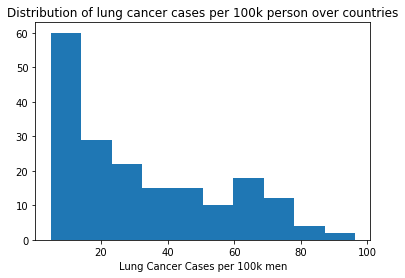

In [29]:
# Histogram of oil consumption:
plt.title("Distribution of lung cancer cases per 100k person over countries")
plt.xlabel("Lung Cancer Cases per 100k men")
plt.hist(co2_lung_df['Lung_cancer_cases_per_100K_men'], bins = 10);

From the Histogram of lung cancer cases data:
> * The distribution of data is right skewed. 


**Question 1 : Does increase in Co2 emisions affect number of lung cancer new cases or not?**

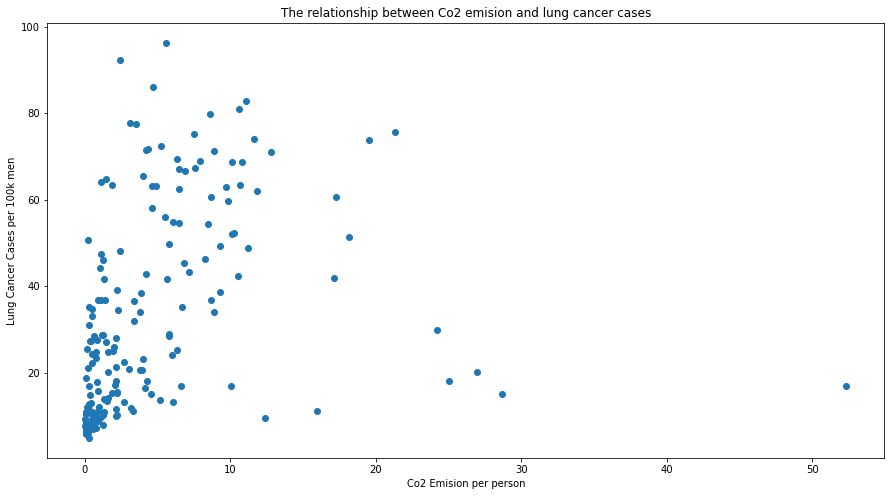

In [30]:
# Scatter plot to show the correlation between co2 emision and lung cancer cases:
plt.figure(figsize=(15,8))
plt.title("The relationship between Co2 emision and lung cancer cases")
plt.ylabel("Lung Cancer Cases per 100k men")
plt.xlabel("Co2 Emision per person")
plt.scatter(co2_lung_df['CO2_Emision_per_person'],co2_lung_df['Lung_cancer_cases_per_100K_men']);

Based on the above Scatter plot, The answer is **Yes**. There is relatively strong positive correlation between lung cancer cases and the co2 emisions.
> As we can see, Countries with higher co2 emisions suffer from higher number of lung cancer new cases while countries with lower emisions have relatively lower number of cases. Although there are number of outliers but most of results follow the positive relationship.
>
> This results generate some more questions. Can we really have lower lung cancer cases and save their lives if we reduce these harmful emisions? . This question is posed to nations leaders if they want to reduce people suffering!

**Question 2 : Is there any relationship between oil consumption and CO2 emisions?**

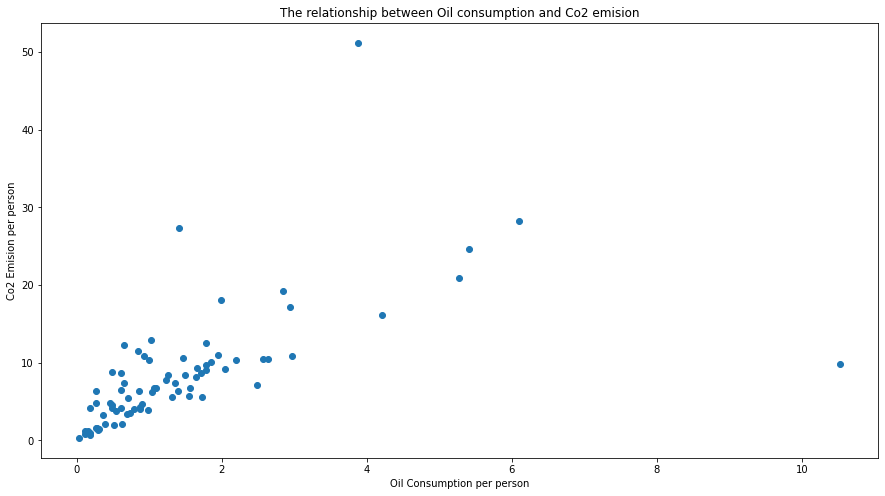

In [31]:
# Scatter plot to show the correlation between co2 emision and Oil consumption:
plt.figure(figsize=(15,8))
plt.title("The relationship between Oil consumption and Co2 emision")
plt.xlabel("Oil Consumption per person")
plt.ylabel("Co2 Emision per person")
plt.scatter(Oil_co2_df['Oil_Consumption_per_person'],Oil_co2_df['CO2_Emision_per_person']);

Based on the plot above. The answer is **Yes**. There is a strong positive correlation between the oil consumption and Co2 Emisions.
> As obviously shown in the plot. With the increase in Oil consumption, There are relative increase in Co2 Emisions as well. 
>
> This Plot can help in encouraging governments to turn to clean resourses and reduce dependence on oil. Co2 Emisions cause harmful damages to environment and lives on earth. One of serious consequenses is Global Warming crisis that causes increase in temperature of earth Which causes the ice to melt, which leads to a rise in the water level and the sinking of the coasts.

<a id='conclusions'></a>
## Conclusions


>Finally, We can summerize our findings in some specific points:
>> * There is a strong positive correlation between Oil consumption and Co2 Emisions.
>> * There is a relatively strong positive correlation between lung cancer cases and the co2 emisions.
>> * There is Great disparity between countries in Co2 Emisions and lung cancer cases. But most countries tend to have lower carbon emissions and lung cancer patients. 

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!